# Lego Analysis

Small analysis of Lego Dataset - mostly to exercise how to combine data and retrieve informations. \
Data from https://rebrickable.com/downloads/
## 💪 Challenge
Create a report to summarize your findings. Include:

1. What is the average number of Lego sets released per year?
2. What is the average number of Lego parts per year?
3. Are there any number of parts per set ranges? Like cheaper sets have 0-5 bricks in it or something like this.
4. Similar as 3 - what was average parts per set in 1950 and what is in 2020?
5. What are the 5 most popular colors used in Lego parts?
6. What proportion of Lego parts are transparent?
8. What are the 5 rarest lego bricks?
9. When first transparent bricks were used? What colors became transparent through time?
10. Summarize your findings.


In [1]:
# import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Prepare colors_table

In [2]:
colors_table = pd.read_csv('data\colors.csv.gz')
print(colors_table.head())
print('shape:', colors_table.shape)
print('unique names:', colors_table['name'].nunique())

   id            name     rgb is_trans
0  -1       [Unknown]  0033B2        f
1   0           Black  05131D        f
2   1            Blue  0055BF        f
3   2           Green  237841        f
4   3  Dark Turquoise  008F9B        f
shape: (267, 4)
unique names: 267


In [3]:
colors_table['is_trans_2'] = colors_table['is_trans'] == 't'
colors_table.drop('is_trans', axis='columns', inplace=True)
colors_table.rename(columns={'is_trans_2': 'is_trans'}, inplace=True)
colors_table.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,False
1,0,Black,05131D,False
2,1,Blue,0055BF,False
3,2,Green,237841,False
4,3,Dark Turquoise,008F9B,False


In [4]:
print('unique names:', colors_table['is_trans'].unique())

unique names: [False  True]


In [5]:
colors_table.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,False
1,0,Black,05131D,False
2,1,Blue,0055BF,False
3,2,Green,237841,False
4,3,Dark Turquoise,008F9B,False


Prepare elements

In [6]:
elements_table = pd.read_csv('data\elements.csv.gz')
print(elements_table.head())
print('shape:', elements_table.shape)

   element_id       part_num  color_id  design_id
0     6443403  2277c01pr0009         1     2277.0
1     4566309           2564         0     2564.0
2     4275423          53657      1004    53657.0
3     6194308          92926        71    28967.0
4     6229123          26561         4    26561.0
shape: (95282, 4)


In [7]:
elements_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95282 entries, 0 to 95281
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   element_id  95282 non-null  int64  
 1   part_num    95282 non-null  object 
 2   color_id    95282 non-null  int64  
 3   design_id   70649 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.9+ MB


## QUESTION 1:
1. What is the average number of Lego sets released per year?


In [8]:
sets_table = pd.read_csv('data\sets.csv.gz')
sets_table.head()

,set_num,name,year,theme_id,num_parts,img_url
0,0003977811-1,Ninjago: Book of Adventures,2022,761,1,https://cdn.rebrickable.com/media/sets/0003977...
1,001-1,Gears,1965,756,43,https://cdn.rebrickable.com/media/sets/001-1.jpg
2,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg
3,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg
4,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg


In [9]:
sets_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23873 entries, 0 to 23872
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    23873 non-null  object
 1   name       23873 non-null  object
 2   year       23873 non-null  int64 
 3   theme_id   23873 non-null  int64 
 4   num_parts  23873 non-null  int64 
 5   img_url    23873 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.1+ MB


In [10]:
# more for questions 2 & 3
sets_table.loc[sets_table['num_parts'] == 0].shape

(5876, 6)

In [11]:
# more for questions 2 & 3
np.sort(sets_table['num_parts'].unique())

array([    0,     1,     2, ...,  9987, 10001, 11695], dtype=int64)

In [12]:
sets_table_year = sets_table.groupby('year').agg(Count=('theme_id', 'count')).sort_values(by='year').reset_index()
sets_table_year

,year,Count
0,1949,5
1,1950,6
2,1953,4
3,1954,14
4,1955,39
...,...,...
70,2021,1206
71,2022,1186
72,2023,1128
73,2024,1004


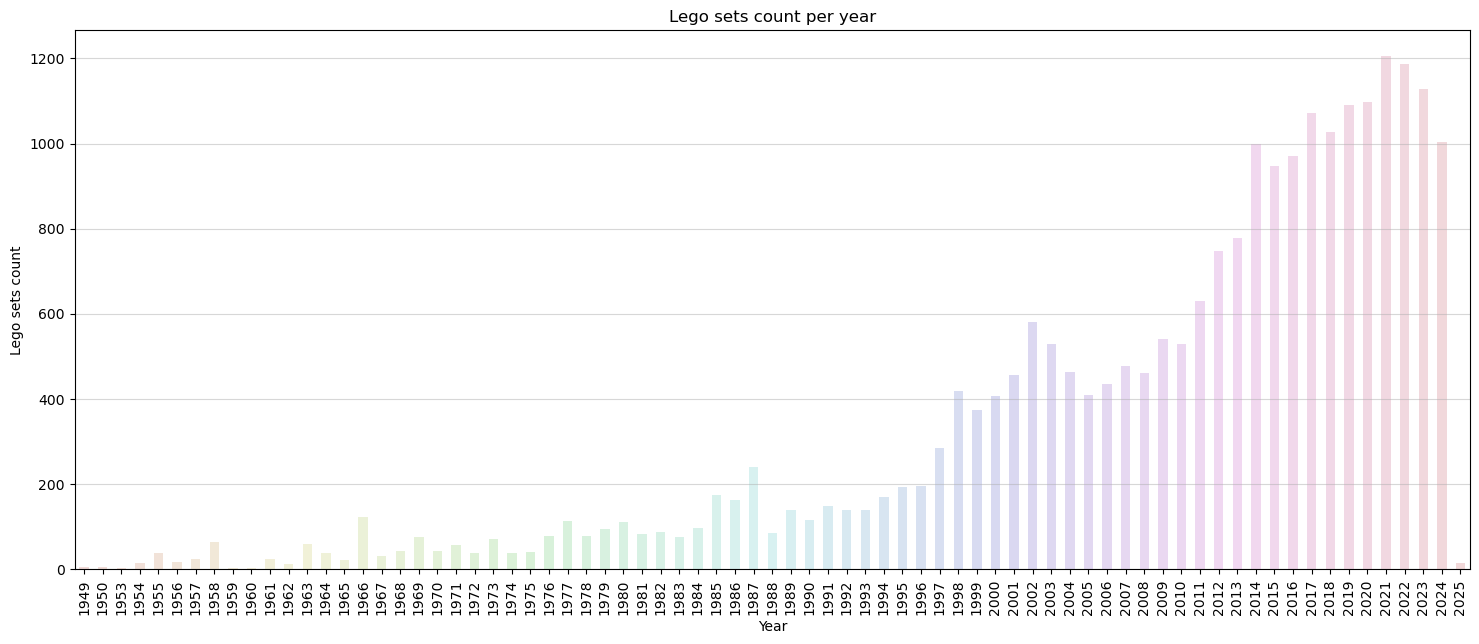

In [13]:
ax = sns.set_style(style=None)
fig, ax = plt.subplots(figsize=(18,7))
plt.grid(axis='y', alpha=0.5)
sns.barplot(data = sets_table_year, x='year', y='Count', alpha=0.25, ax=ax, palette='hls', width=0.5, order=sets_table_year['year']) 
ax.tick_params(axis='x', rotation=90)
ax.set_title('Lego sets count per year')
ax.set_ylabel('Lego sets count')
ax.set_xlabel('Year')
plt.show()

In [14]:
sets_table_year.loc[sets_table_year['year'] < 1960, 'decade'] = 1950 
for decade in range(1960, 2020, 10):
    sets_table_year.loc[np.logical_and(sets_table_year['year'] >= decade, sets_table_year['year'] < decade + 10), 'decade'] = decade 
sets_table_year.loc[sets_table_year['year'] >= 2020, 'decade'] = 2020 
sets_table_year.head()

,year,Count,decade
0,1949,5,1950.0
1,1950,6,1950.0
2,1953,4,1950.0
3,1954,14,1950.0
4,1955,39,1950.0


In [15]:
sets_table_year['decade'].unique()

array([1950., 1960., 1970., 1980., 1990., 2000., 2010., 2020.])

In [16]:
sets_tables_decade = sets_table_year.groupby('decade').agg(Count=('Count', 'sum')).sort_values(by='decade').reset_index()
sets_tables_decade['decade'] = sets_tables_decade['decade'].astype(int)
sets_tables_decade

,decade,Count
0,1950,179
1,1960,426
2,1970,652
3,1980,1252
4,1990,2177
5,2000,4761
6,2010,8790
7,2020,5636


In [44]:
sets_tables_decade['Avg'] = sets_tables_decade['Count'] / 10
sets_tables_decade.loc[sets_tables_decade['decade'] == 1950, 'Avg'] = sets_tables_decade.loc[sets_tables_decade['decade'] == 1950, 'Count'] / 11
sets_tables_decade.loc[sets_tables_decade['decade'] == 2020, 'Avg'] = sets_tables_decade.loc[sets_tables_decade['decade'] == 2020, 'Count'] / 5

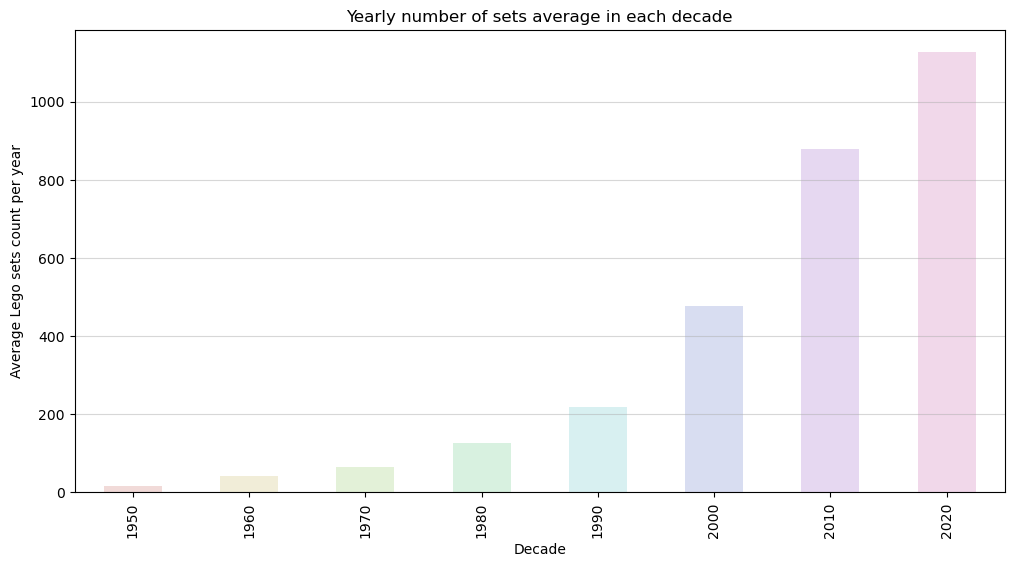

In [46]:
ax = sns.set_style(style=None)
fig, ax = plt.subplots(figsize=(12,6))
plt.grid(axis='y', alpha=0.5)
sns.barplot(data = sets_tables_decade, x='decade', y='Avg', alpha=0.25, ax=ax, palette='hls', width=0.5, order=sets_tables_decade['decade']) 
ax.tick_params(axis='x', rotation=90)
ax.set_title('Yearly number of sets average in each decade')
ax.set_ylabel('Average Lego sets count per year')
ax.set_xlabel('Decade')
plt.show()

## QUESTION 2:
2. What is the average number of Lego parts per year?


In [47]:
inventories_df = pd.read_csv('data\inventories.csv.gz')
inventories_df.head()

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


In [48]:
inventories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40462 entries, 0 to 40461
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       40462 non-null  int64 
 1   version  40462 non-null  int64 
 2   set_num  40462 non-null  object
dtypes: int64(2), object(1)
memory usage: 948.5+ KB


In [49]:
inventories_df.loc[inventories_df['version'] != 1].head()

,id,version,set_num
10601,16490,2,6515-1
10659,16878,2,8030-1
10742,17793,2,76081-1
10743,17799,2,214.6-1
10747,17848,2,421-2


In [50]:
inventories_df.loc[np.logical_and(inventories_df['version'] == 1, inventories_df['set_num'] == '421-2')].head()

,id,version,set_num
9138,14143,1,421-2


In [51]:
inventory_parts_df = pd.read_csv('data\inventory_parts.csv.gz')
inventory_parts_df.head()

,inventory_id,part_num,color_id,quantity,is_spare,img_url
0,1,48379c04,72,1,f,https://cdn.rebrickable.com/media/parts/photos...
1,1,48391,0,1,f,https://cdn.rebrickable.com/media/parts/photos...
2,1,48395,7,1,f,https://cdn.rebrickable.com/media/parts/photos...
3,1,48864c01,25,1,f,NaN
4,1,stickerupn0077,9999,1,f,NaN


In [52]:
inventory_parts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286599 entries, 0 to 1286598
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   inventory_id  1286599 non-null  int64 
 1   part_num      1286599 non-null  object
 2   color_id      1286599 non-null  int64 
 3   quantity      1286599 non-null  int64 
 4   is_spare      1286599 non-null  object
 5   img_url       1279381 non-null  object
dtypes: int64(3), object(3)
memory usage: 58.9+ MB


In [53]:
inventory_parts_df.loc[inventory_parts_df['inventory_id'] == 17848]

,inventory_id,part_num,color_id,quantity,is_spare,img_url
532889,17848,3004,4,8,f,https://cdn.rebrickable.com/media/parts/elemen...
532890,17848,3005,4,6,f,https://cdn.rebrickable.com/media/parts/elemen...
532891,17848,3008,4,2,f,https://cdn.rebrickable.com/media/parts/elemen...
532892,17848,3009,4,2,f,https://cdn.rebrickable.com/media/parts/elemen...
532893,17848,3010,4,2,f,https://cdn.rebrickable.com/media/parts/elemen...


In [54]:
inventory_parts_df.loc[inventory_parts_df['inventory_id'] == 14143]

,inventory_id,part_num,color_id,quantity,is_spare,img_url
448074,14143,3004,14,8,f,https://cdn.rebrickable.com/media/parts/elemen...
448075,14143,3005,14,6,f,https://cdn.rebrickable.com/media/parts/elemen...
448076,14143,3008,14,2,f,https://cdn.rebrickable.com/media/parts/elemen...
448077,14143,3009,14,2,f,https://cdn.rebrickable.com/media/parts/elemen...
448078,14143,3010,14,2,f,https://cdn.rebrickable.com/media/parts/elemen...


In [55]:
inventory_parts_df.loc[inventory_parts_df['inventory_id'] == 14143, 'quantity'].sum()

20

In [56]:
inventory_parts_df.loc[inventory_parts_df['inventory_id'] == 17848, 'quantity'].sum()

20

So it looks that version is different if the set was inventoried more than once. So versions > 1 should be excluded from further analysis. -> <b> I don't know - to check As for now, I delete data with other versions than 1. I think it woul be best to leave top version in each case. </b>

In [103]:
parts_per_set_year_df = inventory_parts_df.merge(inventories_df, left_on='inventory_id', right_on='id', how='outer')
parts_per_set_year_df.head()

,inventory_id,part_num,color_id,quantity,is_spare,img_url,id,version,set_num
0,1.0,48379c04,72.0,1.0,f,https://cdn.rebrickable.com/media/parts/photos...,1,1,7922-1
1,1.0,48391,0.0,1.0,f,https://cdn.rebrickable.com/media/parts/photos...,1,1,7922-1
2,1.0,48395,7.0,1.0,f,https://cdn.rebrickable.com/media/parts/photos...,1,1,7922-1
3,1.0,48864c01,25.0,1.0,f,NaN,1,1,7922-1
4,1.0,stickerupn0077,9999.0,1.0,f,NaN,1,1,7922-1


In [104]:
parts_per_set_year_df.drop(columns=['id'], inplace=True)
parts_per_set_year_df = parts_per_set_year_df.loc[parts_per_set_year_df['version'] == 1]
parts_per_set_year_df.drop(columns=['version'], inplace=True)

In [107]:
parts_per_set_year_df = parts_per_set_year_df.merge(figs_quantity_df, on='inventory_id')
parts_per_set_year_df.head()

,inventory_id,part_num,color_id,quantity_x,is_spare,img_url,set_num,fig_num,quantity_y,name,num_parts,total_quantity
0,3.0,2343,47.0,1.0,f,https://cdn.rebrickable.com/media/parts/elemen...,3931-1,fig-001549,1,"Emma - Lavender Top, Magenta Skirt",4,4
1,3.0,3003,29.0,1.0,f,https://cdn.rebrickable.com/media/parts/elemen...,3931-1,fig-001549,1,"Emma - Lavender Top, Magenta Skirt",4,4
2,3.0,30176,2.0,1.0,f,https://cdn.rebrickable.com/media/parts/elemen...,3931-1,fig-001549,1,"Emma - Lavender Top, Magenta Skirt",4,4
3,3.0,3020,15.0,1.0,f,https://cdn.rebrickable.com/media/parts/elemen...,3931-1,fig-001549,1,"Emma - Lavender Top, Magenta Skirt",4,4
4,3.0,3022,15.0,2.0,f,https://cdn.rebrickable.com/media/parts/elemen...,3931-1,fig-001549,1,"Emma - Lavender Top, Magenta Skirt",4,4


In [108]:
# TODO - fix table above -> first groupby inventory_id then merge with figs_quantity + first groupby figs quantity

In [63]:
parts_per_set_year_df_2 = parts_per_set_year_df.groupby('set_num').agg(Parts_Count=('quantity', 'sum')).reset_index()
parts_per_set_year_df_2.head()

,set_num,Parts_Count
0,0003977811-1,1
1,001-1,43
2,0012-1,2
3,0013-1,2
4,0014-1,2


In [66]:
parts_per_set_year_df_3 = parts_per_set_year_df_2.merge(sets_table, on='set_num')
parts_per_set_year_df_3.drop(columns=['img_url'], inplace=True)
parts_per_set_year_df_3.head()

,set_num,Parts_Count,name,year,theme_id,num_parts
0,0003977811-1,1,Ninjago: Book of Adventures,2022,761,1
1,001-1,43,Gears,1965,756,43
2,0012-1,2,Space Mini-Figures,1979,143,12
3,0013-1,2,Space Mini-Figures,1979,143,12
4,0014-1,2,Space Mini-Figures,1979,143,2


In [74]:
inventory_minifigs_df = pd.read_csv('data\inventory_minifigs.csv.gz')
inventory_minifigs_df.head()

,inventory_id,fig_num,quantity
0,3,fig-001549,1
1,4,fig-000764,1
2,19,fig-000555,1
3,25,fig-000574,1
4,26,fig-000842,1


In [102]:
minifigs_df = pd.read_csv('data\minifigs.csv.gz')
minifigs_df.head()

,fig_num,name,num_parts,img_url
0,fig-000001,Toy Store Employee,4,https://cdn.rebrickable.com/media/sets/fig-000...
1,fig-000002,Customer Kid,4,https://cdn.rebrickable.com/media/sets/fig-000...
2,fig-000003,"Assassin Droid, White",8,https://cdn.rebrickable.com/media/sets/fig-000...
3,fig-000004,"Man, White Torso, Black Legs, Brown Hair",4,https://cdn.rebrickable.com/media/sets/fig-000...
4,fig-000005,Captain America with Short Legs,3,https://cdn.rebrickable.com/media/sets/fig-000...


In [105]:
figs_quantity_df = inventory_minifigs_df.merge(minifigs_df, on='fig_num')
figs_quantity_df

,inventory_id,fig_num,quantity,name,num_parts,img_url
0,3,fig-001549,1,"Emma - Lavender Top, Magenta Skirt",4,https://cdn.rebrickable.com/media/sets/fig-001...
1,4,fig-000764,1,Danny Longlegs / Corporal Steel,4,https://cdn.rebrickable.com/media/sets/fig-000...
2,14589,fig-000764,1,Danny Longlegs / Corporal Steel,4,https://cdn.rebrickable.com/media/sets/fig-000...
3,19,fig-000555,1,Coca-Cola Defender 2,4,https://cdn.rebrickable.com/media/sets/fig-000...
4,25,fig-000574,1,Minnie Mouse with Dark Pink with White Spots D...,5,https://cdn.rebrickable.com/media/sets/fig-000...
...,...,...,...,...,...,...
22466,238939,fig-015442,1,"Firefighter, Black Fire Suit, Vibrant Yellow S...",5,https://cdn.rebrickable.com/media/sets/fig-015...
22467,239867,fig-015523,1,Pharell Williams,4,https://cdn.rebrickable.com/media/sets/fig-015...
22468,239867,fig-015524,1,Helen Lasichanh,4,https://cdn.rebrickable.com/media/sets/fig-015...
22469,240810,fig-015517,1,"Nova - Adventure Camp, Yellowish Green Shorts",4,https://cdn.rebrickable.com/media/sets/fig-015...


In [106]:
figs_quantity_df.drop(columns=['img_url'], inplace=True)
figs_quantity_df['total_quantity'] = figs_quantity_df['quantity'] * figs_quantity_df['num_parts']
figs_quantity_df.head()

,inventory_id,fig_num,quantity,name,num_parts,total_quantity
0,3,fig-001549,1,"Emma - Lavender Top, Magenta Skirt",4,4
1,4,fig-000764,1,Danny Longlegs / Corporal Steel,4,4
2,14589,fig-000764,1,Danny Longlegs / Corporal Steel,4,4
3,19,fig-000555,1,Coca-Cola Defender 2,4,4
4,25,fig-000574,1,Minnie Mouse with Dark Pink with White Spots D...,5,5


In [79]:
parts_df = pd.read_csv('data\parts.csv.gz')
parts_df.head()

,part_num,name,part_cat_id,part_material
0,003381,Sticker Sheet for Set 663-1,58,Plastic
1,003383,"Sticker Sheet for Sets 618-1, 628-2",58,Plastic
2,003402,"Sticker Sheet for Sets 310-3, 311-1, 312-3",58,Plastic
3,003429,Sticker Sheet for Set 1550-1,58,Plastic
4,003432,"Sticker Sheet for Sets 357-1, 355-1, 940-1",58,Plastic


In [83]:
part_cat_df = pd.read_csv('data\part_categories.csv.gz')
part_cat_df.head()

,id,name
0,1,Baseplates
1,3,Bricks Sloped
2,4,"Duplo, Quatro and Primo"
3,5,Bricks Special
4,6,Bricks Wedged


In [67]:
parts_per_set_year_df_3['difference'] = parts_per_set_year_df_3['Parts_Count'] - parts_per_set_year_df_3['num_parts']

In [68]:
parts_per_set_year_df_3[parts_per_set_year_df_3['difference'] != 0]

,set_num,Parts_Count,name,year,theme_id,num_parts,difference
2,0012-1,2,Space Mini-Figures,1979,143,12,-10
3,0013-1,2,Space Mini-Figures,1979,143,12,-10
5,0015-1,3,Space Mini-Figures,1979,143,18,-15
6,0016-1,3,Castle Mini Figures,1979,189,15,-12
22,0241187567-1,71,Ninjago: Build Your Own Adventure,2015,761,74,-3
...,...,...,...,...,...,...,...
17752,YODACHRON-1,391,Yoda Chronicles Promotional Set,2013,158,413,-22
17753,auditt-1,60,Audi TT Roadster (Legoland Deutschland),2002,425,57,3
17757,e1a1403-1,116,MUJI Moving Set,2011,301,109,7
17785,sw117promo-1,1,Darth Vader: 56. International Toy Fair Nuernberg,2005,158,4,-3


In [73]:
parts_per_set_year_df_3['difference'].describe()

count    17789.000000
mean        -0.494182
std         14.175315
min       -309.000000
25%         -4.000000
50%          0.000000
75%          1.000000
max        697.000000
Name: difference, dtype: float64

C:\Users\Dom\AppData\Local\Temp\ipykernel_10000\166186184.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = parts_per_set_year_df_3.loc[(parts_per_set_year_df_3['difference'] != 0) & (parts_per_set_year_df_3['num_parts'] != 0)], \
C:\Users\Dom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


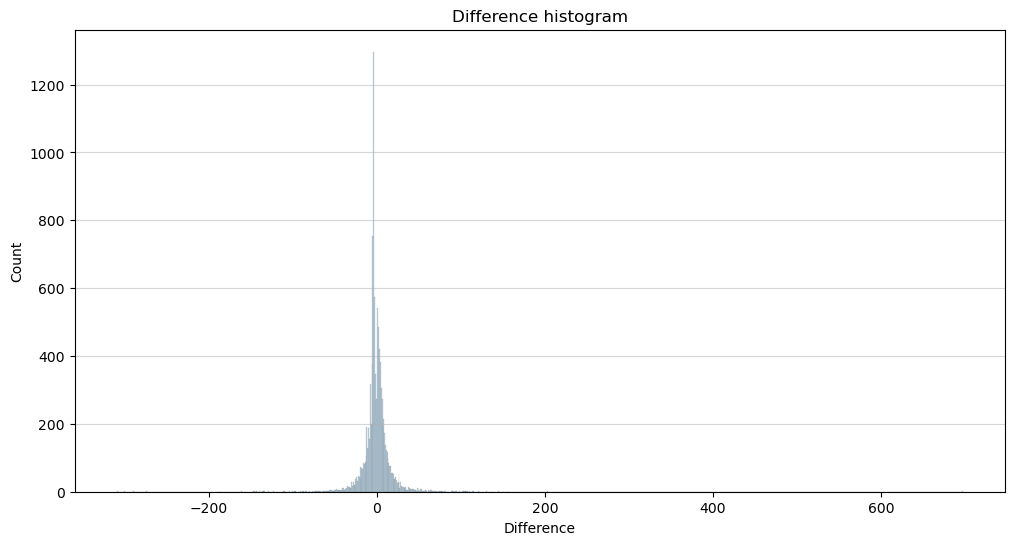

In [94]:
ax = sns.set_style(style=None)
fig, ax = plt.subplots(figsize=(12,6))
plt.grid(axis='y', alpha=0.5)
sns.histplot(data = parts_per_set_year_df_3.loc[(parts_per_set_year_df_3['difference'] != 0) & (parts_per_set_year_df_3['num_parts'] != 0)], \
             x='difference', alpha=0.25, ax=ax, palette='hls') 
ax.set_title('Difference histogram')
ax.set_ylabel('Count')
ax.set_xlabel('Difference')
plt.show()

In [96]:
parts_per_set_year_df_3.loc[parts_per_set_year_df_3['difference'] == 697]

,set_num,Parts_Count,name,year,theme_id,num_parts,difference
7283,4535-1,731,LEGO Express Deluxe,2002,236,34,697


In [31]:
parts_per_set_year_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1174448 entries, 0 to 1286447
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   inventory_id  1174448 non-null  int64 
 1   part_num      1174448 non-null  object
 2   color_id      1174448 non-null  int64 
 3   quantity      1174448 non-null  int64 
 4   is_spare      1174448 non-null  object
 5   img_url       1167928 non-null  object
 6   set_num       1174448 non-null  object
dtypes: int64(3), object(4)
memory usage: 71.7+ MB


In [32]:
np.sort(inventory_parts_df['part_num'].unique())

array(['003381', '003383', '003402', ..., 'wood03', 'wood04',
       'znapupn0005'], dtype=object)

In [33]:
parts_per_set_year_df.loc[parts_per_set_year_df['set_num'] == '60287-1', 'quantity'].sum()

146

In [78]:
sets_table.loc[sets_table['set_num'] == '60287-1']

,set_num,name,year,theme_id,num_parts,img_url
12594,60287-1,Tractor,2021,57,148,https://cdn.rebrickable.com/media/sets/60287-1...


In [86]:
tractor_parts_desc = parts_per_set_year_df.loc[parts_per_set_year_df['set_num'] == '60287-1'].merge(parts_df, on='part_num')
tractor_parts_desc

,inventory_id,part_num,color_id,quantity,is_spare,img_url,set_num,name,part_cat_id,part_material
0,80991,11214,72,2,f,https://cdn.rebrickable.com/media/parts/elemen...,60287-1,Technic Axle Pin 3L with Friction Ridges Lengt...,53,Plastic
1,80991,11458,71,2,f,https://cdn.rebrickable.com/media/parts/elemen...,60287-1,Plate Special 1 x 2 with Pin Hole on Top,9,Plastic
2,80991,15573,4,4,f,https://cdn.rebrickable.com/media/parts/elemen...,60287-1,Plate Special 1 x 2 with 1 Stud with Groove an...,9,Plastic
3,80991,18671,72,2,f,https://cdn.rebrickable.com/media/parts/elemen...,60287-1,Bracket 3 x 2 x 1 1/3 with Pin Bottom,9,Plastic
4,80991,22885,19,2,f,https://cdn.rebrickable.com/media/parts/elemen...,60287-1,Brick Special 1 x 2 x 1 2/3 with 4 Studs on 1 ...,5,Plastic
...,...,...,...,...,...,...,...,...,...,...
73,80991,91988,0,1,f,https://cdn.rebrickable.com/media/parts/elemen...,60287-1,Plate 2 x 14,14,Plastic
74,80991,93606,4,1,f,https://cdn.rebrickable.com/media/parts/elemen...,60287-1,Slope Curved 4 x 2 No Studs,37,Plastic
75,80991,98138,47,2,f,https://cdn.rebrickable.com/media/parts/elemen...,60287-1,Tile Round 1 x 1,67,Plastic
76,80991,98138,47,1,t,https://cdn.rebrickable.com/media/parts/elemen...,60287-1,Tile Round 1 x 1,67,Plastic


In [87]:
tractor_parts_desc.drop(columns=['img_url', 'part_material'], inplace=True)
tractor_parts_desc.head()

,inventory_id,part_num,color_id,quantity,is_spare,set_num,name,part_cat_id
0,80991,11214,72,2,f,60287-1,Technic Axle Pin 3L with Friction Ridges Lengt...,53
1,80991,11458,71,2,f,60287-1,Plate Special 1 x 2 with Pin Hole on Top,9
2,80991,15573,4,4,f,60287-1,Plate Special 1 x 2 with 1 Stud with Groove an...,9
3,80991,18671,72,2,f,60287-1,Bracket 3 x 2 x 1 1/3 with Pin Bottom,9
4,80991,22885,19,2,f,60287-1,Brick Special 1 x 2 x 1 2/3 with 4 Studs on 1 ...,5


In [88]:
tractor_parts_desc = tractor_parts_desc.merge(part_cat_df, left_on='part_cat_id', right_on='id')
tractor_parts_desc.head()

,inventory_id,part_num,color_id,quantity,is_spare,set_num,name_x,part_cat_id,id,name_y
0,80991,11214,72,2,f,60287-1,Technic Axle Pin 3L with Friction Ridges Lengt...,53,53,Technic Pins
1,80991,2780,0,4,f,60287-1,Technic Pin with Friction Ridges Lengthwise an...,53,53,Technic Pins
2,80991,3749,19,4,f,60287-1,Technic Axle Pin without Friction Ridges Lengt...,53,53,Technic Pins
3,80991,43093,1,2,f,60287-1,Technic Axle Pin with Friction Ridges Lengthwise,53,53,Technic Pins
4,80991,11458,71,2,f,60287-1,Plate Special 1 x 2 with Pin Hole on Top,9,9,Plates Special


In [89]:
tractor_parts_desc.drop(columns=['part_cat_id', 'id'], inplace=True)
tractor_parts_desc.rename(columns={'name_x': 'part name', 'name_y': 'part category'}, inplace=True)
tractor_parts_desc.head()

,inventory_id,part_num,color_id,quantity,is_spare,set_num,part name,part category
0,80991,11214,72,2,f,60287-1,Technic Axle Pin 3L with Friction Ridges Lengt...,Technic Pins
1,80991,2780,0,4,f,60287-1,Technic Pin with Friction Ridges Lengthwise an...,Technic Pins
2,80991,3749,19,4,f,60287-1,Technic Axle Pin without Friction Ridges Lengt...,Technic Pins
3,80991,43093,1,2,f,60287-1,Technic Axle Pin with Friction Ridges Lengthwise,Technic Pins
4,80991,11458,71,2,f,60287-1,Plate Special 1 x 2 with Pin Hole on Top,Plates Special


In [90]:
tractor_parts_desc['part category'].unique()

array(['Technic Pins', 'Plates Special', 'Bricks Special', 'Tiles',
       'Tiles Special', 'Bricks', 'Tiles Round and Curved',
       'Plants and Animals', 'Containers', 'Plates', 'Technic Bricks',
       'Technic Connectors', 'Technic Axles', 'Technic Beams',
       'Windscreens and Fuselage', 'Transportation - Land',
       'Bricks Sloped', 'Hinges, Arms and Turntables', 'Bricks Curved',
       'Wheels and Tyres', 'Bars, Ladders and Fences',
       'Bricks Round and Cones', 'Plates Round Curved and Dishes',
       'Technic Special'], dtype=object)

In [99]:
tractor_parts_desc.loc[tractor_parts_desc['part category'].isin(['Plants and Animals', 'Plates Round Curved and Dishes'])]

,inventory_id,part_num,color_id,quantity,is_spare,set_num,part name,part category
29,80991,29685pr0001,15,1,f,60287-1,"Animal, Rabbit / Bunny with Black Eyes and Mou...",Plants and Animals
30,80991,33051,4,1,f,60287-1,"Plant, Apple",Plants and Animals
31,80991,33172,25,2,f,60287-1,"Plant, Carrot",Plants and Animals
32,80991,33183,10,1,t,60287-1,"Plant, Carrot Top",Plants and Animals
33,80991,33183,10,3,f,60287-1,"Plant, Carrot Top",Plants and Animals
34,80991,51270,25,1,f,60287-1,"Plant, Pumpkin",Plants and Animals
75,80991,85861,71,1,t,60287-1,Plate Round 1 x 1 with Open Stud,Plates Round Curved and Dishes
76,80991,85861,71,1,f,60287-1,Plate Round 1 x 1 with Open Stud,Plates Round Curved and Dishes


In [101]:
inventory_minifigs_df.loc[inventory_minifigs_df['inventory_id'] == 80991]

,inventory_id,fig_num,quantity
16462,80991,fig-010818,1
16463,80991,fig-010819,1


In [35]:
parts_per_set_year_df.loc[(parts_per_set_year_df['set_num'] == '60287-1') & (parts_per_set_year_df['is_spare'] == 't'), 'is_spare'].count()

6

In [36]:
sets_table.loc[(sets_table['set_num'] == '60287-1')]

,set_num,name,year,theme_id,num_parts,img_url
12594,60287-1,Tractor,2021,57,148,https://cdn.rebrickable.com/media/sets/60287-1...


In [37]:
parts_per_set_year_df.loc[parts_per_set_year_df['set_num'] == '10782-1', 'quantity'].sum()

101

In [38]:
parts_per_set_year_df.loc[parts_per_set_year_df['set_num'] == '10782-1']

,inventory_id,part_num,color_id,quantity,is_spare,img_url,set_num
987065,120153,10126,10,1,f,https://cdn.rebrickable.com/media/parts/elemen...,10782-1
987066,120153,10127,10,1,f,https://cdn.rebrickable.com/media/parts/elemen...,10782-1
987067,120153,11089,0,1,f,https://cdn.rebrickable.com/media/parts/elemen...,10782-1
987068,120153,11458,4,2,f,https://cdn.rebrickable.com/media/parts/elemen...,10782-1
987069,120153,15535,25,4,f,https://cdn.rebrickable.com/media/parts/elemen...,10782-1
...,...,...,...,...,...,...,...
987121,120153,92926,72,1,f,https://cdn.rebrickable.com/media/parts/elemen...,10782-1
987122,120153,93273,85,1,f,https://cdn.rebrickable.com/media/parts/elemen...,10782-1
987123,120153,93273,19,2,f,https://cdn.rebrickable.com/media/parts/elemen...,10782-1
987124,120153,99207,1,1,f,https://cdn.rebrickable.com/media/parts/elemen...,10782-1


In [39]:
sets_table.loc[(sets_table['set_num'] == '10782-1')]

,set_num,name,year,theme_id,num_parts,img_url
779,10782-1,Hulk vs. Rhino Truck Showdown,2022,755,110,https://cdn.rebrickable.com/media/sets/10782-1...


In [40]:
inventories_df.loc[(inventories_df['set_num'] == '10782-1')]

,id,version,set_num
31217,120153,1,10782-1


In [41]:
parts_per_set_year_df.loc[(parts_per_set_year_df['set_num'] == '10782-1') & (parts_per_set_year_df['is_spare'] == 't')]

,inventory_id,part_num,color_id,quantity,is_spare,img_url,set_num
987079,120153,30153,36,1,t,https://cdn.rebrickable.com/media/parts/elemen...,10782-1
987093,120153,33078,4,1,t,https://cdn.rebrickable.com/media/parts/elemen...,10782-1


In [42]:
parts_per_set_year_df = parts_per_set_year_df.merge(sets_table, on='set_num')

In [43]:
parts_per_set_year_df.head()

,inventory_id,part_num,color_id,quantity,is_spare,img_url_x,set_num,name,year,theme_id,num_parts,img_url_y
0,1,48379c04,72,1,f,https://cdn.rebrickable.com/media/parts/photos...,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,https://cdn.rebrickable.com/media/sets/7922-1.jpg
1,1,48391,0,1,f,https://cdn.rebrickable.com/media/parts/photos...,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,https://cdn.rebrickable.com/media/sets/7922-1.jpg
2,1,48395,7,1,f,https://cdn.rebrickable.com/media/parts/photos...,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,https://cdn.rebrickable.com/media/sets/7922-1.jpg
3,1,48864c01,25,1,f,NaN,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,https://cdn.rebrickable.com/media/sets/7922-1.jpg
4,1,stickerupn0077,9999,1,f,NaN,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,https://cdn.rebrickable.com/media/sets/7922-1.jpg


## QUESTION 3:
3. Are there any number of parts per set ranges? Like cheaper sets have 0-5 bricks in it or something like this.


## QUESTION 4:
4. Similar as 3 - what was average parts per set in 1950 and what is in 2020?

## QUESTION 5:
5. What are the 5 most popular colors used in Lego parts?


## QUESTION 6:
6. What proportion of Lego parts are transparent?



## QUESTION 7
7. When first transparent bricks were used? What colors became transparent through time?

## QUESTION 8:
8. What are the 5 rarest lego bricks?


## QUESTION 9:
9. Summarize your findings.